# Bank Campaign Analysis/Modeling

In [498]:
#Import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_blobs, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import collections as coll
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [499]:
#import dataset

data = pd.read_csv('/Users/apple/Desktop/bank/bank.csv', delimiter=';')
display(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## Question 1

### Parse the dataset and obtain the target column as a separate variable.

In [500]:
#create variables

X = data.drop(columns='y')
y = data.y

###### Explanation: The features and the target variable are extracted from the given dataset by looking at the definition of each one of them from the given website and the business case/scenario

## Question 2

### Obtain a report of the different features inside the dataset, check if all the features are useful for our prediction, if not drop them.

In [501]:
#summary statistics of the features previously extracted

X.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN


In [502]:
#columns information regarding the type of variables we are dealing with 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


###### In the next part I will look at the distribution of the observations for each single feature to see whether some of them are unbalanced

In [503]:
X.job.value_counts() #ok, no need to drop it

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [504]:
X.marital.value_counts() #ok, no need to drop it 

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [505]:
X.education.value_counts() #ok, no need to drop it

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [506]:
X.default.value_counts() #unbalanced towards 'no'

no     4445
yes      76
Name: default, dtype: int64

In [507]:
X.housing.value_counts() #ok, no need to drop it 

yes    2559
no     1962
Name: housing, dtype: int64

In [508]:
X.loan.value_counts() #ok, no need to drop it 

no     3830
yes     691
Name: loan, dtype: int64

In [509]:
X.contact.value_counts() #many values fall under 'unknown' but the feature remains relevant for the analysis

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [510]:
X.poutcome.value_counts() #unbalanced towards 'unknown' which gives us no insight regarding the given feature

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [511]:
y.value_counts() #unbalanced towards 'no'

no     4000
yes     521
Name: y, dtype: int64

###### Insight: The information regarding the unbalanced target variable is very important for our analysis since it will force us not only to look at the accuracy of the models but also at both precision and recall to see whether it performs as well for both categories

In [512]:
#check for missing values

X.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

###### Insight: no missing value can be identified for any feature

In [513]:
#dropping variables

X.drop(columns = ['day', 'month', 'default', 'poutcome', 'duration'], inplace = True)

###### Explanation: the features "day" and "month" were dropped since they gave information on when the client was last contacted in a precise date in the past. Clearly, these features add no value in predicting whether or not the client will then join the service given the performed campaign. "default" was dropped since it almost only contained values for the category "no", therefore it showed a great degree of unbalance. Finally, "duration" was dropped since by looking at the description of the feature, it is said that it causes target leakage; indeed, by trying out a very basic model with this latter included, the feature importance attributes more than 60% of importance to this one, hiding the importance of every other useful feature.

## Question 3

### As most of the features are of a categorical nature, apply the LabelEncoder to the target data (y) and OrdinalEncoder to each one of the features.

In [514]:
#label encoder on target variable

lbl_e = LabelEncoder()
lbl_e.fit(y)
y = lbl_e.transform(y)
display(y)

array([0, 0, 0, ..., 0, 0, 0])

In [515]:
#ordinal encoder operation on categorical features

ord_e = OrdinalEncoder()
ord_e.fit(X[['job','marital','education','housing','loan','contact']])
X1 = ord_e.transform(X[['job','marital','education','housing','loan','contact']])
X1 = pd.DataFrame(X1)
X2 = X[['age','balance','campaign','pdays','previous']]

In [516]:
#final training set with encoded features

X = X1.join(X2)
X.rename(columns={0: 'job',1:'marital',2:'education',3:'housing',4:'loan',5:'contact'}, inplace=True)

###### Explanation: The features were first splitted into "Categorical" and "Numerical" to then apply the required encoder. This was done because the ordinal encoder does not distinguish automatically from categorical to non-categorical features from our dataset. Therefore, it was applied to the dataframe containing only the categorical ones and then this latter was merged back to the one containing only the numerical ones. Finally, the features were renamed with the original labels. 

## Question 4

### Perform the data split using the provided SKLearn function on the encoded dataset.

In [517]:
#train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Question 5

### Select a simple supervised model to train with the dataset and explain the decision.

In [518]:
#train simple supervised model

dt_class = DecisionTreeClassifier(max_depth =3)
dt_class.fit(X_train, y_train)
print(dt_class.score(X_train, y_train))
print(dt_class.score(X_test, y_test))

0.8884955752212389
0.8885941644562334


###### Explanation: being the problem a classification one I decided to train a very simple Decision Tree which would allow us to train the data on the given target variable. Regarding the metrics: the accuracy seems to be promising on both training and test sets. Furthermore, there seems to be no overfitting since there is no variability in accuracy between training and test sets. 

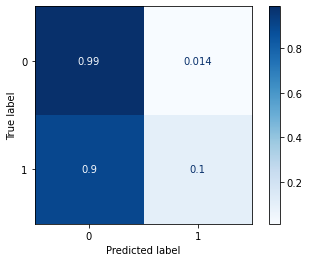

In [519]:
#Confusion Matrix

Confusion_Matrix1 = plot_confusion_matrix(dt_class, X_test, y_test, cmap=plt.cm.Blues, normalize = 'true')

###### Insight: as we can see from the Confusion Matrix here, the high level for the accuracy obtained before can result to be misleading considering the unbalance found in the target variable. Indeed, as expected, the level for the precision is very high, that is 0.99; while the value for the recall is considerably low being 0.1. This is due to the fact that we only have 521 values for "Yes" (11.5%) and the class is not sufficiently represented. This issue could be overcome by creating "synthetic values" and add them to make the underrepresented category. 

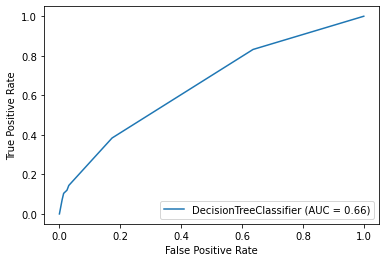

In [520]:
#ROC curve Logistic Regression Model

plot_roc_curve(dt_class, X_test, y_test)

###### Insight: the AUC seems to be relatively low indicating there is room for improvement for the model

Text(0.5, 1.0, 'Feature Importance Analysis')

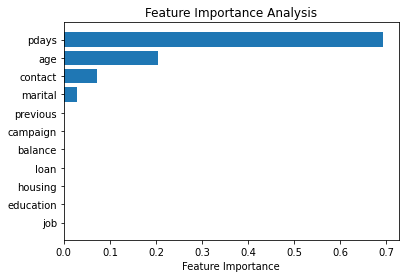

In [521]:
#features importance Decision tree

f_imp = dt_class.feature_importances_
col_names = X.columns.to_list()
df_f_imp = pd.DataFrame(f_imp)
df_f_imp.rename(columns = {0:'Feature Importance'}, inplace = True)
df_col_names = pd.DataFrame({'Features':col_names})
feat_imp = df_col_names.join(df_f_imp)
feat_imp.sort_values('Feature Importance', inplace = True, ascending=True)

plt.barh(feat_imp['Features'], feat_imp['Feature Importance'],align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')

###### Insight: "pdays" seems to take the majority of the importance in terms of features importance analysis. 

## Question 6

### Train a GradientBoostingClassifier, with n_estimators=10 and learning_rate=1, and compare the results with the previous algorithm.

In [522]:
#train GBM

ens_boost = GradientBoostingClassifier(n_estimators=10, learning_rate=1)
ens_boost.fit(X_train, y_train)
print(ens_boost.score(X_train, y_train))
print(ens_boost.score(X_test, y_test))

0.8988200589970502
0.8762157382847038


###### Insight: the model performs relatively better on the training set, although it is lagging behind the basic Decision Tree on the test set. Again, we do not see any sign of overfitting.

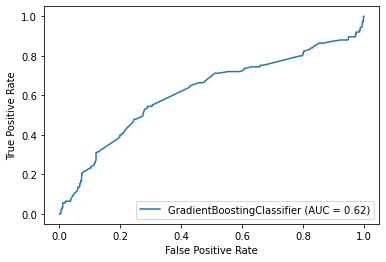

In [523]:
#ROC curve Gradient Boosting Model

plot_roc_curve(ens_boost, X_test, y_test)

###### Insight: the AUC is worse than the one obtained with the previous Decision Tree (0.62 vs 0.66).

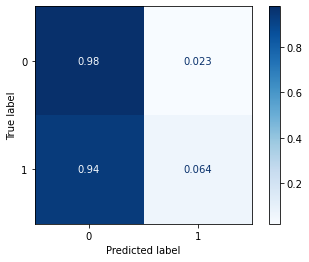

In [524]:
#Confusion Matrix

Confusion_Matrix2 = plot_confusion_matrix(ens_boost, X_test, y_test, cmap=plt.cm.Blues, normalize = 'true')

###### Insight: the problem of the target variable's underrepresented class is even more visible in this case with a recall of 0.072.

Text(0.5, 1.0, 'Feature Importance Analysis')

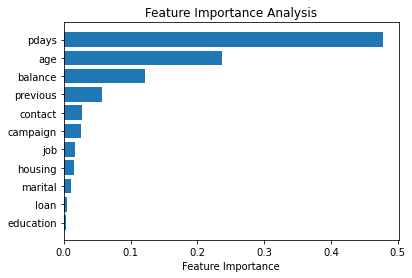

In [525]:
#features importance GBM

f_imp = ens_boost.feature_importances_
col_names = X.columns.to_list()
df_f_imp = pd.DataFrame(f_imp)
df_f_imp.rename(columns = {0:'Feature Importance'}, inplace = True)
df_col_names = pd.DataFrame({'Features':col_names})
feat_imp = df_col_names.join(df_f_imp)
feat_imp.sort_values('Feature Importance', inplace = True, ascending=True)

plt.barh(feat_imp['Features'], feat_imp['Feature Importance'],align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')

###### Insight: "pdays" seems to still be considerably more relevant than the other features although now the importance is more evenly distributed across different features.

## Question 7

### Using the PolynomialFeatures class, compute the second degree interactions of the dataset.
### Retrain the original model (selected by the student in question 5) and compare the results.

In [526]:
#use polynomial features

pol = PolynomialFeatures(degree = 2)
X_poly = pol.fit_transform(X)

#train-test split 

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, random_state = 42)

In [527]:
#re-train initial simple supervised model

dt_class1 = DecisionTreeClassifier(max_depth=3)
dt_class1.fit(X_train_p, y_train_p)
print(dt_class1.score(X_train_p, y_train_p))
print(dt_class1.score(X_test_p, y_test_p))

0.8896755162241888
0.887709991158267


###### Insight: compared to the original model, this latter seems to show less overfitting by looking at the variability of the accuracy between train and test sets. Additionally, the accuracy on the test set has marginally increased.

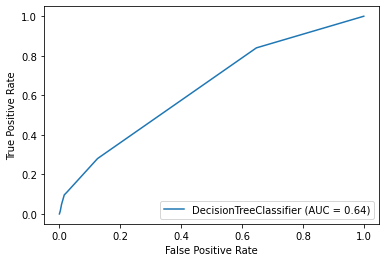

In [528]:
#ROC curve 

plot_roc_curve(dt_class1, X_test_p, y_test_p)

###### Insight: the AUC is slightly worse than the original model.

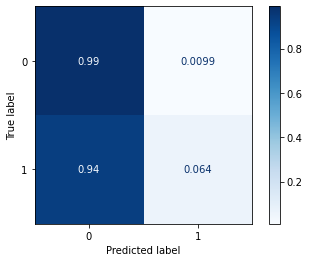

In [529]:
#Confusion Matrix

Confusion_Matrix3 = plot_confusion_matrix(dt_class1, X_test_p, y_test_p, cmap=plt.cm.Blues, normalize = 'true')

###### Insight: we again encounter the same issue of underrepresentation, which in this case is even worse showing a recall equal to 0.064.

## Question 8

### Using the function cross_val_score, and a Kfold with 5 folds, validate the original trained model (selected by the student in question 5) and the GradientBoostingClassifier. Which conclusions can be extracted?

In [530]:
#cross-validation

kfold = KFold(n_splits=5)
val1 = cross_validate(ens_boost, X, y, cv=kfold)
print(val1)
val_score1 = cross_val_score(ens_boost, X, y, cv=kfold)
print(val_score1.mean())

{'fit_time': array([0.04374814, 0.04994106, 0.03830981, 0.03877974, 0.03837681]), 'score_time': array([0.00595093, 0.00301385, 0.00235319, 0.0022881 , 0.00251007]), 'test_score': array([0.87624309, 0.86725664, 0.87168142, 0.88716814, 0.86615044])}
0.8732577128049674


###### Insight: the accuracy metric on the different selection of test sets operated by the cross-validation algorithm 5 times always pivots around 0.873. This means the model does not overfit the given data because there is no variability in this latter. Additionally, there is no underfitting because the average accuracy is exactly the same as the one estimated before. To conclude, the model is generalizing the data very well!

Text(0.5, 1.0, 'Cross Validation Break Down')

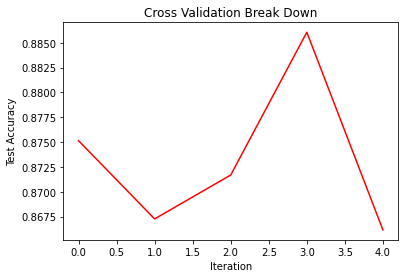

In [531]:
## cross-validation break down analysis

df_scores1 = pd.DataFrame(val_score1)
df_scores1.rename(columns={0:"Test Accuracy"}, inplace = True)
index1 = df_scores1.index.to_list()
plt.plot(index1, df_scores1['Test Accuracy'], color = 'red')
plt.xlabel('Iteration')
plt.ylabel('Test Accuracy')
plt.title('Cross Validation Break Down')

###### Insight: the fact that overfitting is not an issue in our case is even more visible by looking at this chart which shows the accuracy break down for every combination/iteration of the cross-validation algorithm.

## Question 9 

### Using the original (not encoded) dataset, apply the OneHotEncoder transformation to the whole dataset. Is there any difference in the number of features/columns than in the original?

###### The following steps have been repeated to make the whole process clearer to the reader.

In [532]:
#re-import dataset

data = pd.read_csv('/Users/apple/Desktop/bank/bank.csv', delimiter=';')
display(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [533]:
#new variables 

X_new = data.drop(columns = 'y')
y_new = data.y

In [534]:
#Dropping the same variables as before

X_new.drop(columns = ['day', 'month', 'default', 'poutcome', 'duration'], inplace = True)

In [535]:
#one-hot encoder

enc_o = OneHotEncoder(categories='auto', sparse = False)
enc_o.fit(X_new)
X_new = enc_o.transform(X_new)

In [536]:
X_new = pd.DataFrame(X_new)
X_new.shape

(4521, 2794)

###### Explanation: since the OneHotEncoder algorithm performs one hot encoding on every single feature, both numerical and categorical, we will have as many more features as unique values appear for every single feature in the dataset. Therefore, when we look at the shape of the new Dataframe of the new created variables, it will be much larger on the second dimension. This because, we will have many more features than the original one. 

## Question 10

### Retrain the original model (selected by the student in question 5) using the new encoded dataset, and compare the results with the previous results. Validate this model with this dataset using the same functions as in question 8.

In [537]:
#train-test split

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, random_state = 42)

In [538]:
#re-train previous logistic regression

dt_class2 = DecisionTreeClassifier(max_depth=3)
dt_class2.fit(X_new_train, y_new_train)
print(dt_class2.score(X_new_train, y_new_train))
print(dt_class2.score(X_new_test, y_new_test))

0.8873156342182891
0.8903625110521662


###### Insight: there appears to be no major improvement compared to the very first model by executing both One Hot Encoding and Cross-Validation on this new model

In [539]:
#cross-validation on new logistic regression

kfold = KFold(n_splits=5)
val = cross_validate(dt_class2, X_new, y_new, cv=kfold)
print(val)
val_score = cross_val_score(dt_class2, X_new, y_new, cv=kfold)
print(val_score.mean())

#the test score on the different selections of test sets is very low, indicating no overfitting. Additionally,
#the mean score reflects the one obtained with the normal testing procedure indicating no underfitting either.

{'fit_time': array([0.51128793, 0.59185219, 0.43332005, 0.50536919, 0.51800323]), 'score_time': array([0.02517819, 0.02763009, 0.02608013, 0.02775025, 0.0273397 ]), 'test_score': array([0.88729282, 0.88274336, 0.88827434, 0.89380531, 0.87721239])}
0.8858656431819293


###### Insight: there seems again to be no overfitting by looking at the variability of the accuracy on the different combinations of test sets.

Text(0.5, 1.0, 'Cross Validation Break Down')

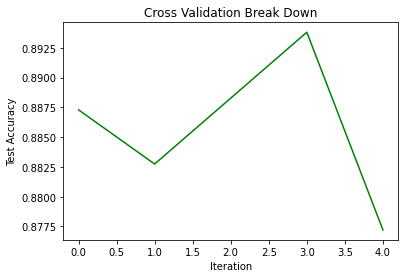

In [540]:
#cross-validation break down analysis 

df_scores = pd.DataFrame(val_score)
df_scores.rename(columns={0:"Test Accuracy"}, inplace = True)
index = df_scores.index.to_list()
plt.plot(index, df_scores['Test Accuracy'], color = 'green')
plt.xlabel('Iteration')
plt.ylabel('Test Accuracy')
plt.title('Cross Validation Break Down')

###### Insight: the fact that there is no overfitting is even more visible by looking at the above chart.

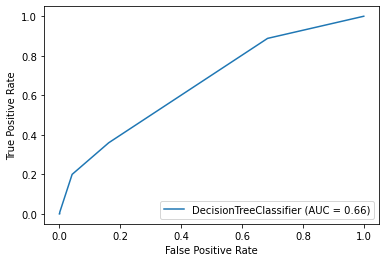

In [497]:
#ROC curve for logistic regression

plot_roc_curve(dt_class2, X_new_test, y_new_test)

#accordingly with this new model we have not achieved a superior solution if the ROC curve and AUC is taken into
#into consideration. 

###### Insight: the ROC curve is exactly the same as the very first model, indicating no improvement.